<a href="https://colab.research.google.com/github/bdfd/Portfolio_Project05_Customer_Churn/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Customer Churn

##Basic Approach

The Approach
1. Perform some quick EDA(Exploratory Data Analysis)
2. Use sk-learn K Nearest Neighbor Algorithm
3. Covert data into an array
4. Changing categorical variables to integer values(Done Already)
5. Converting the target variable to an array

Target Cluster
Datasets is about a set of customer categories, all of whom pruchased tele service. Each customer responded to one of 4 conditions include 1, 2, 3, 4.
*   Target Variable - custcat options:
  *   1
  *   2
  *   3
  *   4

In [21]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
%matplotlib inline
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [9]:
# read the dataset
data_path = 'https://raw.githubusercontent.com/bdfd/Portfolio_Project05_Customer_Churn/main/dataset/Tele_Custom.csv'
# upload dataset into data frame
df = pd.read_csv(data_path)
df.head(3)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3


##Use scikit-learn library, Covert Pandas Data Frame to Numpy Array:

In [13]:
#.astype(float)
x = df[['region','tenure','age','marital','address','income','ed','employ','retire','gender','reside']].values
x[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [15]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

##Normalizing the Data
Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases.

In [17]:
# from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

## Train and Test Data Split

In [20]:
#from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
print('Train Set:', x_train.shape, y_train.shape)
print('Test Set:', x_test.shape, y_test.shape)

Train Set: (800, 11) (800,)
Test Set: (200, 11) (200,)


## Import KNN Library

In [22]:
# from sklearn import metrics
# from sklearn.neighbors import KNeighborsClassifier

##Training the Machine Learning Models for Different K's

In [23]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = []
for n in range(1,Ks):
  #Train Model and Predict
  neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
  yhat = neigh.predict(x_test)
  mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
  std_acc[n-1] = np.std(yhat == y_test)/np.sqrt(yhat.shape[0])

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

In [24]:
mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

In [25]:
std_acc

array([0.0324037 , 0.03208582, 0.03284623, 0.03298485, 0.03284623,
       0.03270321, 0.03337477, 0.0331191 , 0.03349627])

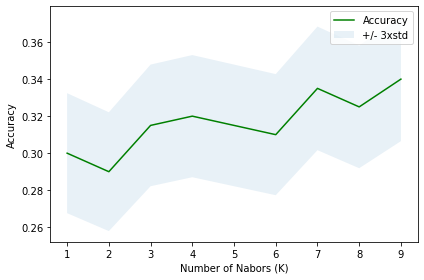

In [27]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.10)
plt.legend(('Accuracy', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [28]:
print("The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1)

The best accuracy was with 0.34 with k = 9
